### Importing required libraries

In [1]:
# from jupyterthemes import get_themes
# from jupyterthemes.stylefx import set_nb_theme
# set_nb_theme('gruvboxd')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns', None)
sns.set(style="darkgrid")
%matplotlib inline

### Data import

In [3]:
taxi_jan_2024 = pd.read_parquet('DATA/yellow_tripdata_2024-01.parquet')
taxi_df = pd.concat([taxi_jan_2024])

### Data Exploration

In [4]:
display(taxi_df.head())
print(f'Shape of dataset : {taxi_df.shape}')
print(f'The total number of rows : {taxi_df.shape[0]}')
print(f'The total number of columns : {taxi_df.shape[1]}')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


Shape of dataset : (2964624, 19)
The total number of rows : 2964624
The total number of columns : 19


In [5]:
taxi_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

## Feature selection
#### picking only the required attributes for further analysis

In [6]:
taxi_df = taxi_df[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 
                  'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 
                  'payment_type', 'total_amount'  ]]

In [7]:
taxi_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10


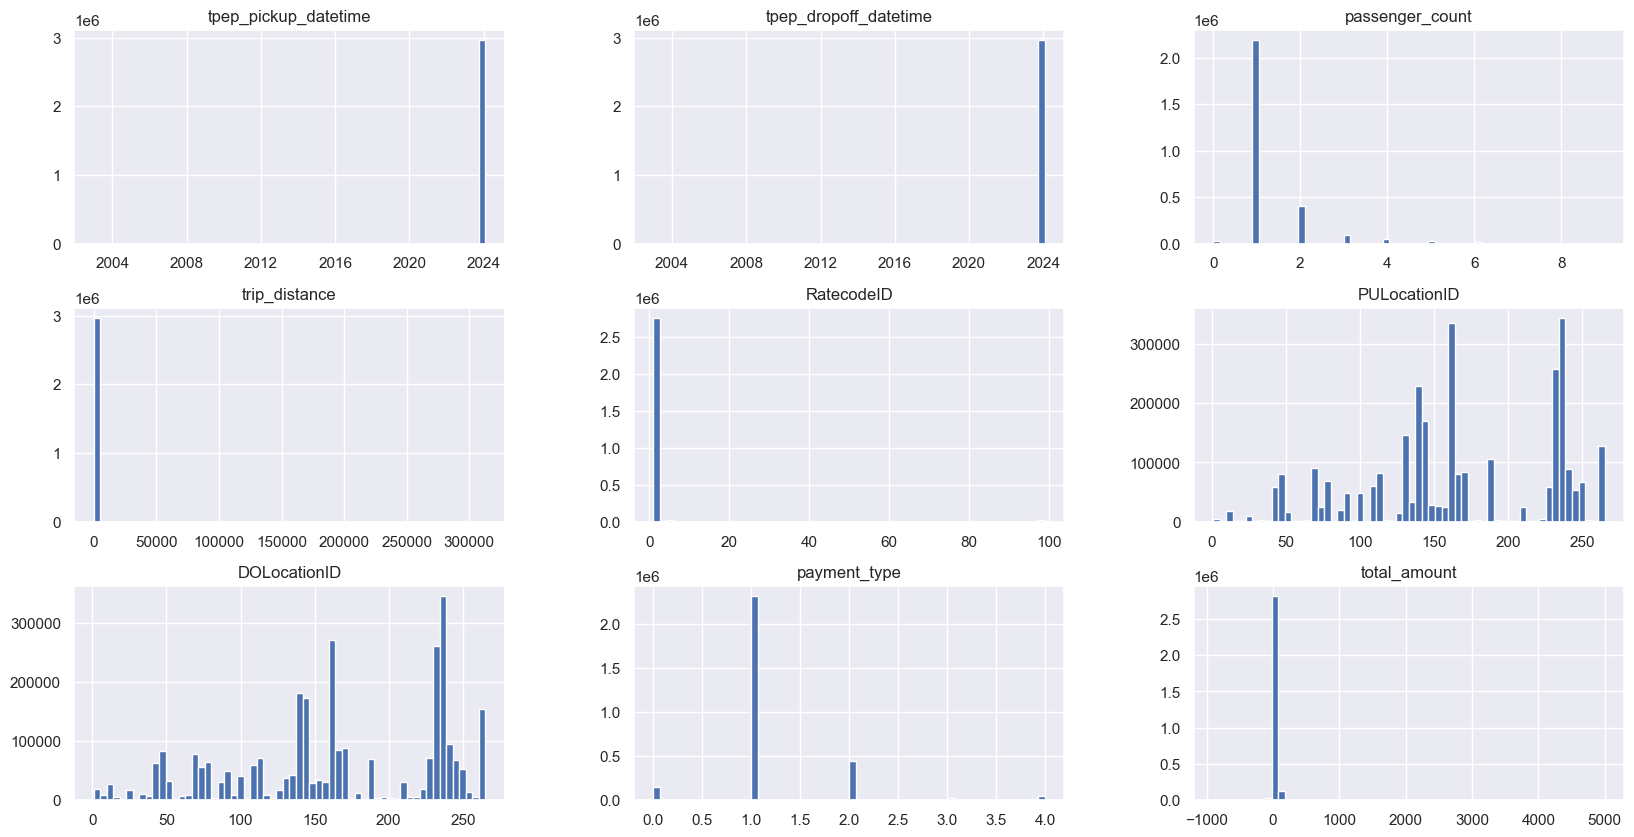

In [8]:
taxi_df.hist(figsize=(20, 10), bins=60)
plt.show()

### total_amount analysis

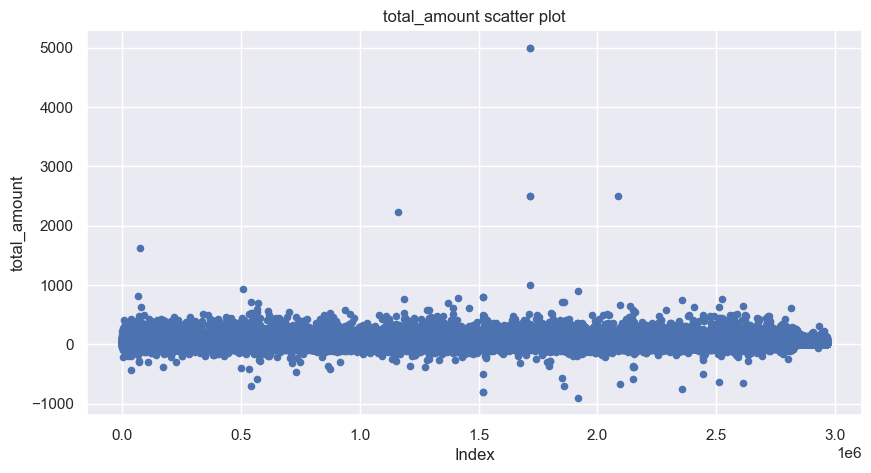

In [9]:
taxi_df.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10, 5))
plt.title('total_amount scatter plot')
plt.xlabel('Index')
plt.ylabel('total_amount')
plt.show()

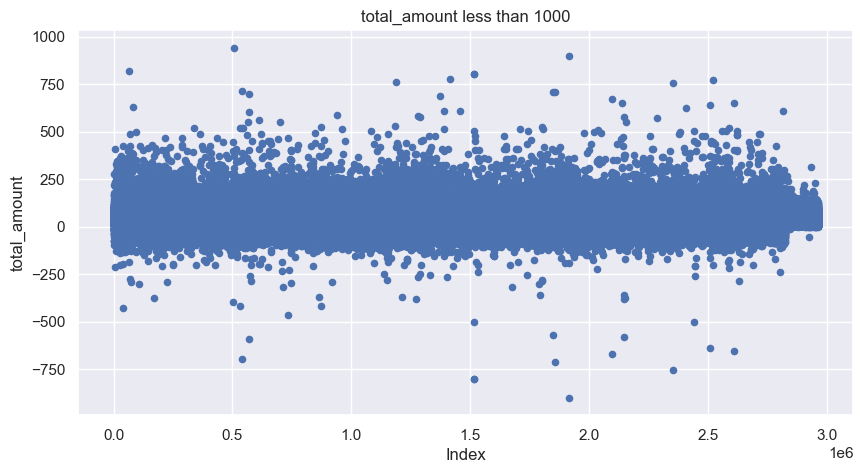

In [10]:
taxi_df[taxi_df['total_amount']<1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10, 5))
plt.title('total_amount less than 1000')
plt.xlabel('Index')
plt.ylabel('total_amount')
plt.show()

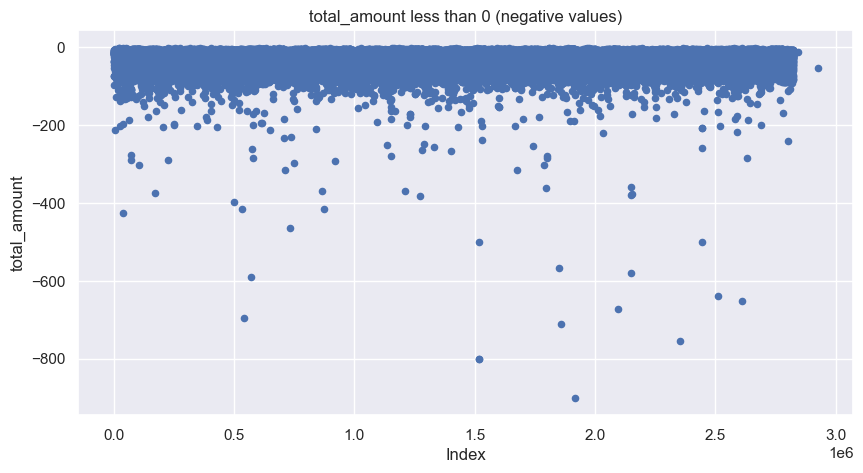

In [11]:
taxi_df[taxi_df['total_amount']<0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10, 5))
plt.title('total_amount less than 0 (negative values)')
plt.xlabel('Index')
plt.ylabel('total_amount')
plt.show()

In [12]:
print('Total number of negative values : {}'.format(sum(taxi_df['total_amount']<0)))

Total number of negative values : 35504


In [13]:
taxi_df[taxi_df['total_amount']<0]['payment_type'].value_counts()

payment_type
4    21406
2     8326
3     5741
1       29
0        2
Name: count, dtype: int64

### total_amount less than zero vs trip_distance

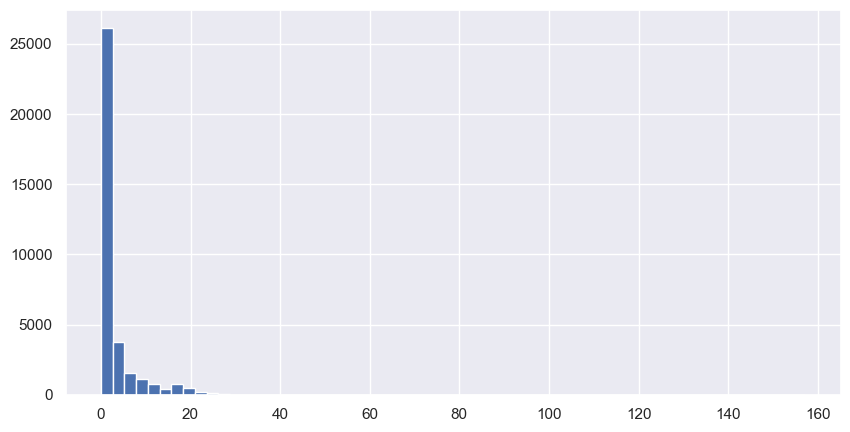

In [14]:
taxi_df[taxi_df['total_amount']<0]['trip_distance'].hist(bins=60, figsize=(10, 5))
plt.show()

In [15]:
print(taxi_df[taxi_df['total_amount']==0].shape)

(416, 9)


In [16]:
taxi_df[taxi_df['total_amount']==0]['payment_type'].value_counts()

payment_type
1    129
4    128
3     83
2     65
0     11
Name: count, dtype: int64

<Axes: >

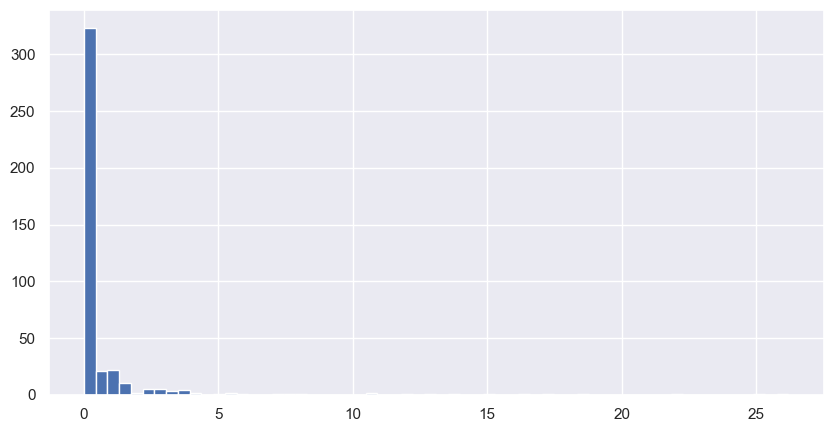

In [17]:
taxi_df[taxi_df['total_amount']==0]['trip_distance'].hist(bins=60, figsize=(10, 5))

In [18]:
taxi_df[taxi_df['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     287
0.10      21
0.20       8
0.90       8
0.50       7
1.60       6
1.00       5
0.80       5
0.70       5
1.10       4
0.30       4
1.30       4
0.60       4
0.40       3
3.00       3
2.50       3
2.40       2
3.40       2
3.80       2
1.80       2
1.70       2
10.70      2
12.10      1
25.10      1
1.40       1
12.80      1
1.74       1
2.70       1
18.40      1
15.00      1
5.30       1
3.30       1
2.90       1
17.10      1
4.20       1
3.50       1
4.00       1
21.90      1
16.50      1
26.20      1
13.60      1
7.70       1
3.60       1
5.50       1
5.80       1
4.90       1
8.10       1
1.20       1
7.00       1
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

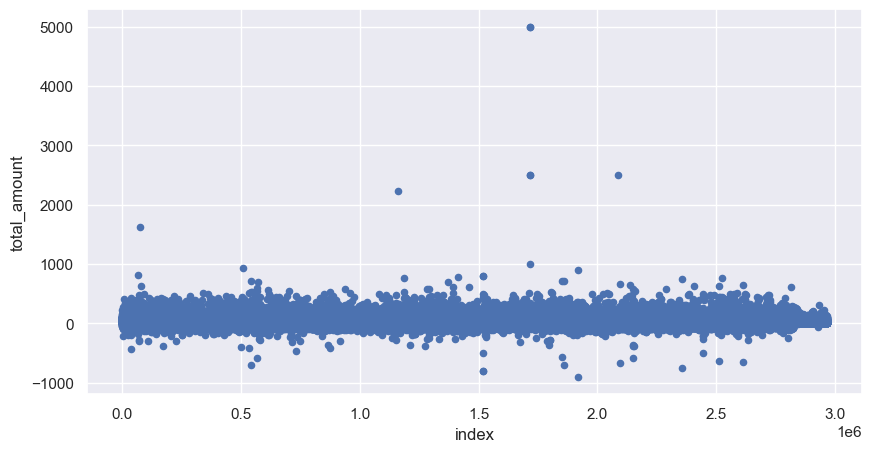

In [19]:
taxi_df.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10, 5))

In [20]:
print(taxi_df[taxi_df['total_amount']>200].shape)

(2005, 9)


In [21]:
taxi_df['total_amount'].mean()

26.801504770925415

### Observations & Inference
1. around 35504 data has negative values for total_amount
2. 416 data has total_amount as zero
3. average 27 dollars taxi fare is collected
4. can remove these data where total_amount == 0 
5. we can agree to cut from $200

#### better to get rid of negative values, if not can confuse the model / cause bias

## Data Cleaning

In [22]:
taxi_data_filtered = taxi_df[(taxi_df['total_amount']>0)&(taxi_df['total_amount']<200)]

In [23]:
print(taxi_df.shape)
taxi_data_filtered.shape

(2964624, 9)


(2926691, 9)

In [27]:
taxi_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2926691 entries, 0 to 2964623
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   RatecodeID             float64       
 5   PULocationID           int32         
 6   DOLocationID           int32         
 7   payment_type           int64         
 8   total_amount           float64       
dtypes: datetime64[ns](2), float64(4), int32(2), int64(1)
memory usage: 201.0 MB


In [24]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140142
trip_distance                 0
RatecodeID               140142
PULocationID                  0
DOLocationID                  0
payment_type                  0
total_amount                  0
dtype: int64

lets change the datatyes of passenger_count and RatecodeID

#### attributes passenger_count and RatecodeID has missing values

In [25]:
taxi_data_filtered.RatecodeID.value_counts()

RatecodeID
1.0     2630775
2.0       96656
99.0      28624
5.0       17839
3.0        7445
4.0        5205
6.0           5
Name: count, dtype: int64

In [26]:
taxi_data_filtered.passenger_count.value_counts()

passenger_count
1.0    2159494
2.0     399219
3.0      89865
4.0      50795
5.0      33380
0.0      31421
6.0      22316
8.0         50
7.0          8
9.0          1
Name: count, dtype: int64